## Domain Plot

In [1]:
from  isotools import Transcriptome
import isotools
print (f'This is isotools version {isotools.__version__}')

from isotools.plots import plot_bar, plot_distr, plot_saturation, plot_rarefaction
import os
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import logging
import pathlib

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)

plt.rcParams['axes.unicode_minus']=False
plt.rcParams["font.size"]=8
plt.rcParams["font.family"]='sans-serif'#"Times New Roman"
plt.rcParams['figure.dpi']=200
# capital first in axis
# 8 minimum
# 7th feb


This is isotools version 0.3.5rc2


In [2]:

path='/project/42/pacbio/golong'
#this dataset needs at least 40GB (+headroom) main memory
project='golong_all'

ref_fn=f'{path}/../references/gencode/gencode.v36.chr_patch_hapl_scaff.annotation_sorted'
genome_fn=f'{path}/../references/gencode/GRCh38.p13.genome.fa'

path='/project/42/pacbio/golong'
date='2022_12'
project='golong_all'
base_path=f'{path}/06-isotools/{project}/results_{date}'
out_path=f'{path}/06-isotools/{project}/results_{date}/05_domain_plots'
pathlib.Path(out_path).mkdir(parents=True, exist_ok=True)
ref_fn=f'{path}/../references/gencode/gencode.v36.chr_patch_hapl_scaff.annotation_sorted'
genome_fn=f'{path}/../references/gencode/GRCh38.p13.genome.fa'

isoseq=Transcriptome.from_reference(ref_fn+'.isotools.pkl')


INFO:loading transcriptome from /project/42/pacbio/golong/../references/gencode/gencode.v36.chr_patch_hapl_scaff.annotation_sorted.isotools.pkl


In [3]:
# define group and sample colors

sample_tab=pd.read_csv(f'{base_path}/01_transcriptome/{project}_{date}_samples.csv').drop('Unnamed: 0', axis=1)

samples=list(sample_tab.name)
isoseq_groups={grp:[k for k,v in sample_tab.set_index('name')['group'].items() if v==grp] for grp in list(sample_tab.group.drop_duplicates())}
groups={k:v for k,v in isoseq_groups.items() if k[:3] in ['CLL', 'MDS']}
group_num={grp:i for i,grp in enumerate(['K562_mut','K562_wt','Nalm6_mut', 'Nalm6_wt','CLL_mut','CLL_wt', 'MDS_mut', 'MDS_wt','B-cell'])}

groups['CL_wt']=[sa for gr in ['K562_wt', 'Nalm6_wt'] for sa in isoseq_groups[gr]]
groups['CL_mut']=[sa for gr in ['K562_mut', 'Nalm6_mut'] for sa in isoseq_groups[gr]]
groups['B-cell']=isoseq_groups['B-cell']

group_dict={sa:gn for gn,sa_list in groups.items() for sa in sa_list}
#groups['GM12878_ENCODE']=isoseq_groups['GM12878']
group_colors={'CLL_mut':'#B2182B', 'CLL_wt':'#2166AC', 'MDS_mut':'#EF8A62', 'MDS_wt':'#67A9CF','CL_mut':'#FDDBC7' ,'CL_wt':'#D1E5F0','B-cell':'#543005','other':'#018571'}
group_colors['all_mut']=group_colors['MDS_mut']
group_colors['all_wt']=group_colors['MDS_wt']
group_colors['reference']=group_colors['other']

mut_samples=[sa for gn, grp in groups.items() if 'mut' in gn for sa in grp]

sample_colors={sa:group_colors[k] for sa in samples for k,v in groups.items() if sa in v }
sample_colors={sa:sample_colors.get(sa,'#003C30') for sa in samples}
sample_colors['reference']=group_colors['other']

groups_CL={k:v for k,v in groups.items() if k[:3] in ['CL_', 'GM1']}
groups_CLL={k:v for k,v in groups.items() if k in ['CLL_wt', 'CLL_mut', 'B-cell']}
groups_MDS={k:v for k,v in groups.items() if k in ['MDS_wt', 'MDS_mut', 'B-cell']}

group_same_colors={k:group_colors["all_"+k.split("_")[1]] for k in group_colors if 'wt' in k or 'mut' in k}
group_same_colors['B-cell']=group_colors['B-cell']


group_colors={'CLL_mut':'#B2182B', 'CLL_wt':'#2166AC', 'MDS_mut':'#EF8A62', 'MDS_wt':'#67A9CF','CL_mut':'#FDDBC7' ,'CL_wt':'#D1E5F0','B-cell':'#543005','GM12878_ENCODE':'#A6611A', 'other':'#018571'}
group_colors['all_mut']=group_colors['MDS_mut']
group_colors['all_wt']=group_colors['MDS_wt']
group_colors['reference']=group_colors['other']


In [87]:
sf3b1_domains={
    'p14IR':(373,415,'domains'),
    'H1':(491,527,'repeat'),    'H2':(528,567,'repeat'),    'H3':(568,605,'repeat'),    'H4':(606, 640,'repeat'),    'H5':(641, 681,'repeat'), 
    'H6':(682, 720,'repeat'),   'H7':(721, 758,'repeat'),   'H8':(759, 802,'repeat'),   'H9':(803, 845,'repeat'),    'H10':(846, 885,'repeat'),
    'H11':(886, 921,'repeat'),  'H12':(922, 967,'repeat'),  'H13':(968, 1012,'repeat'), 'H14':(1013, 1051,'repeat'), 'H15':(1052, 1089,'repeat'),
    'H16':(1090, 1124,'repeat'),'H17':(1125, 1165,'repeat'),'H18':(1166, 1204,'repeat'),'H19':(1205, 1242,'repeat'), 'H20':(1243, 1276,'repeat'), 
    'an':(1277, 1304,'other')    }
g=isoseq['SF3B1']
tr=g.ref_transcripts[2]
orf=tr['CDS']
#print(orf)
tr.setdefault('domain', {})['annotation']=[]
sf3b1_doms=[]
gmap=[]
for e in reversed(tr['exons']):
    if e[0]>orf[1] or e[1]<orf[0]:
        continue
    gmap.append((max(orf[0],e[0]), min(orf[1], e[1]) ))
#print(gmap)
for i,(dom_name, dom) in enumerate(sf3b1_domains.items()):
    offset=0
    blocks=[]
    blocks_str=[]

    dom_len=dom[1]-dom[0]
    for reg in gmap:
        
        reg_len=reg[1]-reg[0]
        offset+=reg_len
        if offset<(dom[0]*3):
            continue
        if (offset-reg_len)<(dom[1]*3):
            left=max(0,offset-dom[1]*3)
            right=max(0,dom[0]*3-(offset-reg_len))
            blocks.append((reg[0]+left , reg[1]-right))            
            blocks_str.append((f'{reg[0]}+{left}' , f'{reg[1]}-{right}'))            
        else:
            break
            
    print(dom, list(reversed(blocks)))
    b_len=[b[1]-b[0] for b in reversed(blocks)]
    b_start=[b[0]-blocks[-1][0] for b in reversed(blocks)]
    sf3b1_doms.append([i,g.chrom,blocks[-1][0], blocks[0][1], dom_name,0,g.strand, 0,0,0,len(blocks), ','.join(map(str,b_len)), ','.join(map(str,b_start)), dom[2]])
    tr['domain']['annotation'].append([dom_name,dom_name, dom[2], (dom[0]*3, dom[1]*3), (blocks[0][0], blocks[-1][1])])
#gpos={}
cols=['#bin', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'reserved', 'blockCount', 'blockSizes','chromStarts', 'type']
sf3b1_doms=pd.DataFrame(sf3b1_doms, columns=cols)
sf3b1_doms.to_csv(f'{base_path}/05_domain_plots/SF3B1_manual_annotation.csv',sep='\t', index=False)
sf3b1_doms

(373, 415, 'domains') [(197405466, 197405472), (197407997, 197408117)]
(491, 527, 'repeat') [(197403722, 197403764), (197405075, 197405141)]
(528, 567, 'repeat') [(197403602, 197403719)]
(568, 605, 'repeat') [(197402817, 197402826), (197402948, 197403035), (197403584, 197403599)]
(606, 640, 'repeat') [(197402712, 197402814)]
(641, 681, 'repeat') [(197402589, 197402709)]
(682, 720, 'repeat') [(197402047, 197402130), (197402555, 197402586)]
(721, 758, 'repeat') [(197401837, 197401888), (197401984, 197402044)]
(759, 802, 'repeat') [(197401489, 197401525), (197401741, 197401834)]
(803, 845, 'repeat') [(197400897, 197400936), (197401399, 197401486)]
(846, 885, 'repeat') [(197400777, 197400894)]
(886, 921, 'repeat') [(197400389, 197400434), (197400714, 197400774)]
(922, 967, 'repeat') [(197400251, 197400386)]
(968, 1012, 'repeat') [(197398558, 197398581), (197400054, 197400163)]
(1013, 1051, 'repeat') [(197398097, 197398116), (197398460, 197398555)]
(1052, 1089, 'repeat') [(197396327, 197396

,#bin,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,blockSizes,chromStarts,type
0,0,chr2,197405466,197408117,p14IR,0,-,0,0,0,2,"6,120","0,2531",domains
1,1,chr2,197403722,197405141,H1,0,-,0,0,0,2,"42,66","0,1353",repeat
2,2,chr2,197403602,197403719,H2,0,-,0,0,0,1,117,0,repeat
3,3,chr2,197402817,197403599,H3,0,-,0,0,0,3,"9,87,15","0,131,767",repeat
4,4,chr2,197402712,197402814,H4,0,-,0,0,0,1,102,0,repeat
5,5,chr2,197402589,197402709,H5,0,-,0,0,0,1,120,0,repeat
6,6,chr2,197402047,197402586,H6,0,-,0,0,0,2,"83,31","0,508",repeat
7,7,chr2,197401837,197402044,H7,0,-,0,0,0,2,"51,60","0,147",repeat
8,8,chr2,197401489,197401834,H8,0,-,0,0,0,2,"36,93","0,252",repeat
9,9,chr2,197400897,197401486,H9,0,-,0,0,0,2,"39,87","0,502",repeat


In [5]:
mutations=('A284','Y623','R625','N626','H662','K666','Q699','K700', 'V701','I704','G740','K741','G742','A744','D781','D894', 'E902')
mutations=('A284','T432','E622','Y623','R625','N626','H662','K666','Q699','K700','I704','G742','A745','D781','D894')

aa_codes=pd.read_csv(f'{out_path}/aa_codes.txt')
aa_codes=dict(aa_codes.set_index('Three letter code')['One letter code'])
pat_mut_dict=dict(sample_tab.set_index('name')['SF3B1_mut'].dropna())
pat_mut=[(k,f'{aa_codes[v[2:5].lower()]}{v[5:-3]}{aa_codes[v[-3:].lower()]}') for k,vL in pat_mut_dict.items() for v in vL.split(',') ]
found={}
for sa,mut in pat_mut:
    grp=group_dict[sa]
    found.setdefault(mut, {}).setdefault(grp,0)
    found[mut][grp]+=1
    
found_pos={pos[:-1] for pos in found}

Gene SF3B1 chr2:197388514-197435079(-), 14 reference transcripts, 0 expressed transcripts


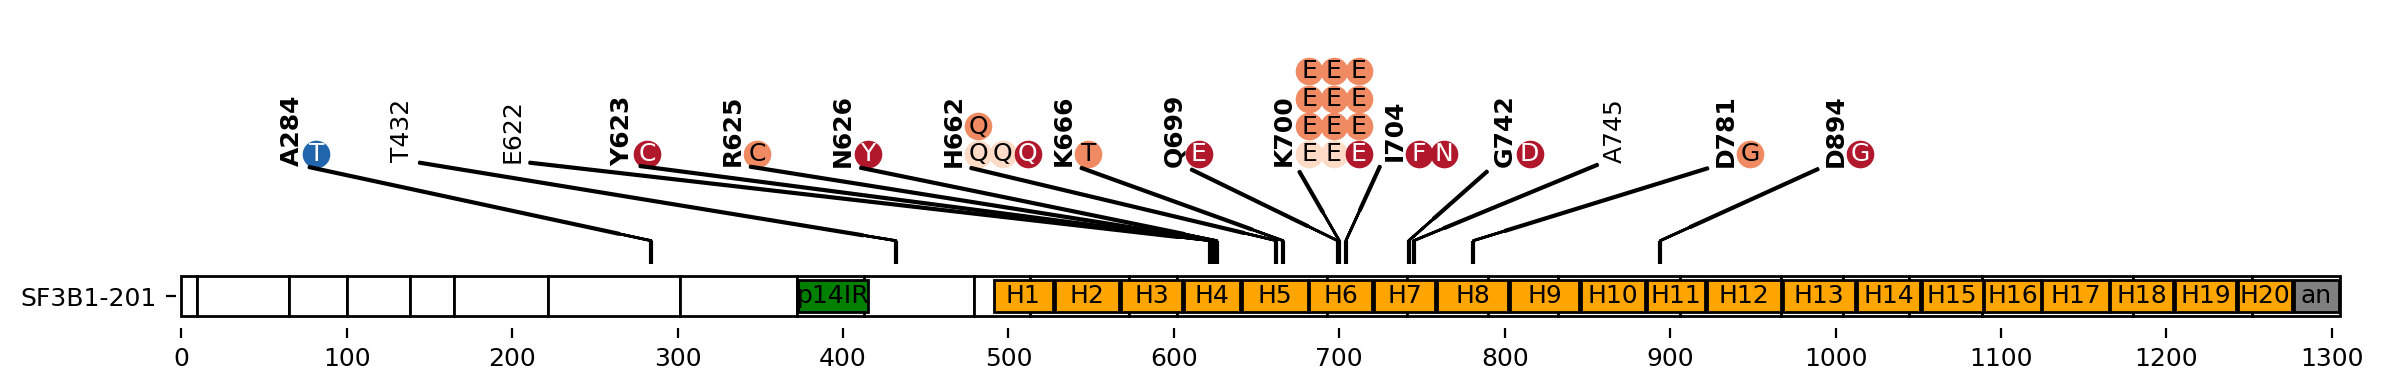

In [9]:
g=isoseq['SF3B1']
print(g)
plt.rcParams["font.size"]=9
plt.rcParams["figure.figsize"] = (14,2)
dom_cols={'domains':'green', 'repeat':'orange' ,'extracellular':'yellow', 'transmembrane':'pink', 'cytoplasmic':'red', "other":"grey"}
hotspot_region=(197402767,197401769)
from matplotlib.backends.backend_pdf import PdfPages
#add csv file to dataframe
with PdfPages(filename = f"{out_path}/golong_sf3b1_domains_samples.pdf") as pdf:    
    fig, ax=plt.subplots()
    #ref_trids=[2]
    #trids=g.filter_transcripts(query='SUBSTANTIAL')
    ax, gmap=g.plot_domains(source='annotation',categories=list(dom_cols), trids=False, ref_trids=[2], include_utr=False, domain_cols=dom_cols, seperate_exons=True, ax=ax)
    ax.set_xticks(np.arange(0,4000,300),np.arange(0,1400,100) )
    mut_pos={}
    for i,mut in enumerate(mutations):
        pos=int(mut[1:])*3
        mut_pos[mut]=200+i*200
        ax.annotate(mut, (pos,0.7), (mut_pos[mut],2.1 ),arrowprops={'width':.5,'headwidth':0}, rotation=90, ha='center',va='center', weight='bold' if mut in found_pos else 'regular')
        ax.vlines(pos,.4,.7, color='k')
    n_pos={}
    for mut, where in found.items():
        n_pos.setdefault(mut[:-1],0)
        for gn,ng in where.items():
            for _ in range(ng):
                x,y=mut_pos[mut[:-1]]+45*(n_pos[mut[:-1]]%3+1), 1.8+.35*(n_pos[mut[:-1]]//3)
                #ax.plot(x,y, 'o', color=group_colors[gn], mec='gray', size=20)
                ax.scatter(x,y,  color=group_colors[gn],  s=80)
                rgb=tuple(int(group_colors[gn][i:i+2], 16) for i in (1, 3, 5))  
                ax.text(x,y,mut[-1],ha='center', va='center', color='white' if sum(rgb)/3<128 else 'black')
                #circle = plt.Circle((mut_pos[mut]+50*(n+i)%3, 1.7+10*(n+i)//3), 10, color=group_colors[gn+'_mut'])
                #ax.add_patch(circle)
                n_pos[mut[:-1]]+=1
            
            
    ax.set(frame_on=False)  
    ax.set_ylim(-.4,3.5)
    pdf.savefig(fig)

## Add the expressed transcripts

In [21]:
read_count_cols={grp_n: grp_n+'_sum_coverage' for grp_n in isoseq_groups}

# add the transcripts from the gtf file
id_map=isoseq.add_sample_from_csv(
    f'{base_path}/01_transcriptome/golong_all_2022_12_substantial_transcripts.csv.gz',
    transcripts_file=f'{base_path}/01_transcriptome/golong_all_2022_12_substantial_transcripts.gtf',
    sample_cov_cols=read_count_cols,
    reconstruct_genes=False
)
# now we want to add qc metrics
isoseq.add_qc_metrics(genome_fn)
isoseq.add_orf_prediction(genome_fn)
file=f'{base_path}/05_domain_plots/SF3B1_manual_annotation.csv'
isoseq.add_annotation_domains(file,category='domain', progress_bar=True, id_col='name', name_col='type')
isoseq.sample_table

,name,file,group,nonchimeric_reads,chimeric_reads
0,K562_wt,/project/42/pacbio/golong/06-isotools/golong_a...,K562_wt,1044061,0
0,K562_mut,/project/42/pacbio/golong/06-isotools/golong_a...,K562_mut,1390170,0
0,Nalm6_wt,/project/42/pacbio/golong/06-isotools/golong_a...,Nalm6_wt,761739,0
0,Nalm6_mut,/project/42/pacbio/golong/06-isotools/golong_a...,Nalm6_mut,1258935,0
0,CLL_wt,/project/42/pacbio/golong/06-isotools/golong_a...,CLL_wt,7294912,0
0,CLL_mut,/project/42/pacbio/golong/06-isotools/golong_a...,CLL_mut,5491999,0
0,MDS_wt,/project/42/pacbio/golong/06-isotools/golong_a...,MDS_wt,3913799,0
0,MDS_mut,/project/42/pacbio/golong/06-isotools/golong_a...,MDS_mut,5722237,0
0,B-cell,/project/42/pacbio/golong/06-isotools/golong_a...,B-cell,978433,0


In [88]:
for tr in isoseq['SF3B1'].transcripts:
    tr['domain']['annotation']=[]
file=f'{base_path}/05_domain_plots/SF3B1_manual_annotation.csv'

isoseq.add_annotation_domains(file,category='domain', progress_bar=True, id_col='name', name_col='type')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 343.06domains/s]
INFO:found domains at 141 transcript loci


In [89]:
print(isoseq['SF3B1'])
for tr in isoseq['SF3B1'].transcripts:
    tr['domain']['annotation']=[(d[0],d[0],d[1],d[3],d[4]) for d in tr['domain']['annotation']]
        

Gene SF3B1 chr2:197388514-197435079(-), 14 reference transcripts, 5 expressed transcripts


Gene SF3B1 chr2:197388514-197435079(-), 14 reference transcripts, 5 expressed transcripts


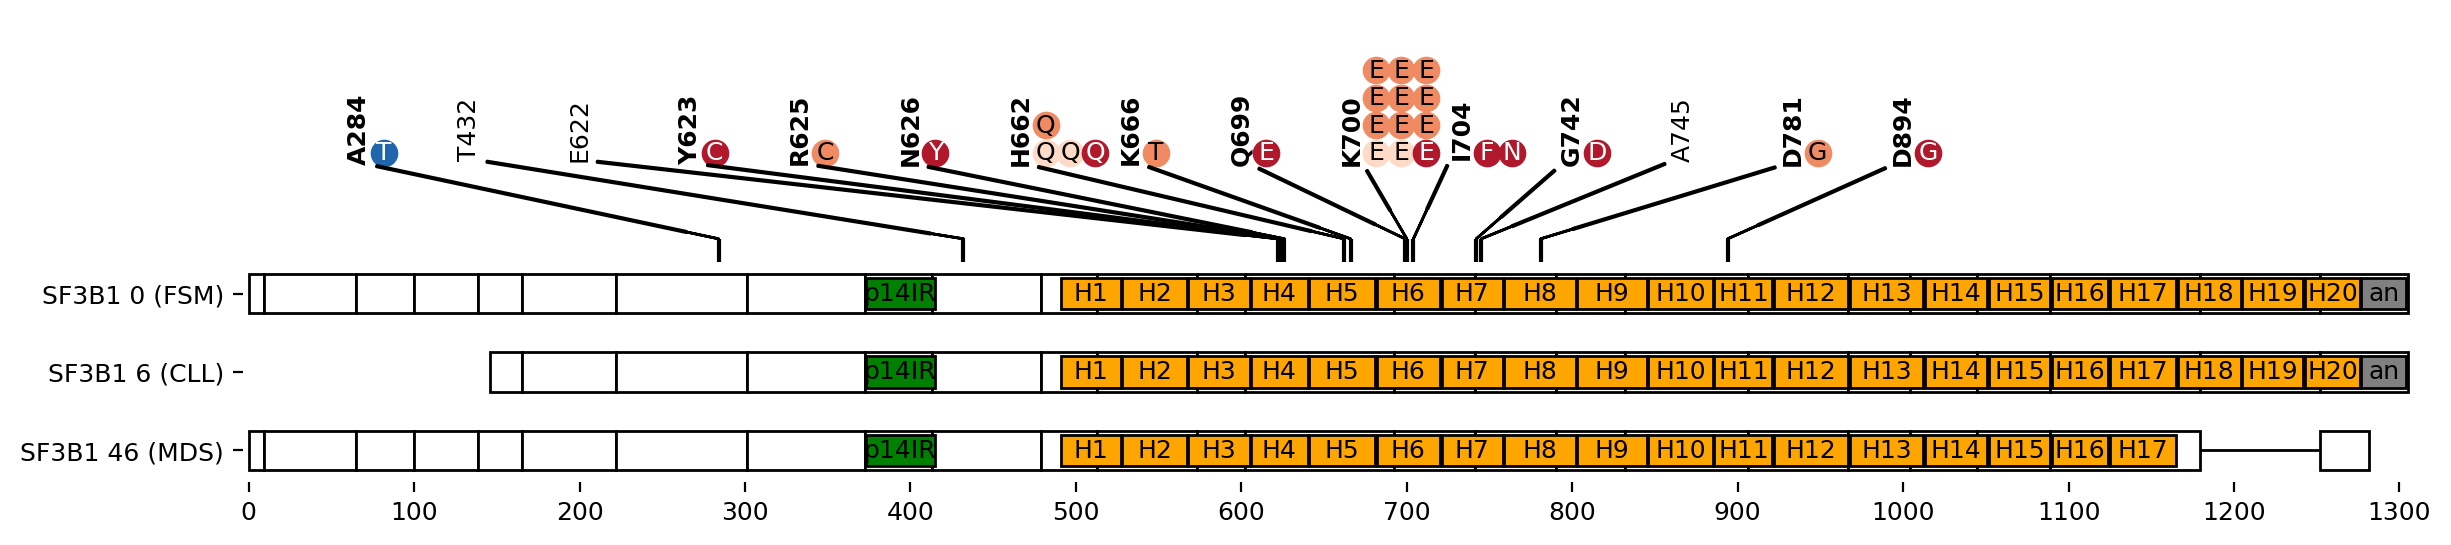

In [98]:
g=isoseq['SF3B1']
#trids=list(range(5))
trids=[0,1,4]
print(g)
plt.rcParams["font.size"]=9
plt.rcParams["figure.figsize"] = (14,3)
dom_cols={'domains':'green', 'repeat':'orange' ,'extracellular':'yellow', 'transmembrane':'pink', 'cytoplasmic':'red', "other":"grey"}
hotspot_region=(197402767,197401769)
from matplotlib.backends.backend_pdf import PdfPages
#add csv file to dataframe
with PdfPages(filename = f"{out_path}/golong_sf3b1_domains_samples_isoforms.pdf") as pdf:    
    fig, ax=plt.subplots()
    #ref_trids=[2]
    #trids=g.filter_transcripts(query='SUBSTANTIAL')
    g.plot_domains(source='annotation',categories=list(dom_cols), trids=trids, include_utr=False, domain_cols=dom_cols, seperate_exons=True, ax=ax)
    ax.set_xticks(np.arange(0,4000,300),np.arange(0,1400,100) )
    mut_pos={}
    for i,mut in enumerate(mutations):
        pos=int(mut[1:])*3
        mut_pos[mut]=200+i*200
        ax.annotate(mut, (pos,0.7), (mut_pos[mut],2.1 ),arrowprops={'width':.5,'headwidth':0}, rotation=90, ha='center',va='center', weight='bold' if mut in found_pos else 'regular')
        ax.vlines(pos,.4,.7, color='k')
    n_pos={}
    for mut, where in found.items():
        n_pos.setdefault(mut[:-1],0)
        for gn,ng in where.items():
            for _ in range(ng):
                x,y=mut_pos[mut[:-1]]+45*(n_pos[mut[:-1]]%3+1), 1.8+.35*(n_pos[mut[:-1]]//3)
                #ax.plot(x,y, 'o', color=group_colors[gn], mec='gray', size=20)
                ax.scatter(x,y,  color=group_colors[gn],  s=80)
                rgb=tuple(int(group_colors[gn][i:i+2], 16) for i in (1, 3, 5))  
                ax.text(x,y,mut[-1],ha='center', va='center', color='white' if sum(rgb)/3<128 else 'black')
                #circle = plt.Circle((mut_pos[mut]+50*(n+i)%3, 1.7+10*(n+i)//3), 10, color=group_colors[gn+'_mut'])
                #ax.add_patch(circle)
                n_pos[mut[:-1]]+=1
            
            
    ax.set(frame_on=False)  
    ax.set_ylim(-2.4,3.5)
    ax.set_yticks([0,-1,-2], labels=['SF3B1 0 (FSM)','SF3B1 6 (CLL)','SF3B1 46 (MDS)'])
    pdf.savefig(fig)

# MDS RNA seq samples domain plot

In [8]:
sample_tab=pd.read_csv('/project/42/pacbio/golong/additional_samples/MDS/20230123_ClinicalData_ReducedSamples.txt', sep=' ')
mut_count=sample_tab.SF3B1_mutation.dropna().value_counts()
mutations=tuple(sorted({mut[:4] for mut in mut_count.keys()}.union(found_pos), key=lambda x: int(x[1:])))

print(mutations)

('A284', 'T432', 'E622', 'Y623', 'R625', 'N626', 'H662', 'K666', 'Q699', 'K700', 'I704', 'G742', 'A745', 'D781', 'D894')


Gene SF3B1 chr2:197388514-197435079(-), 14 reference transcripts, 0 expressed transcripts


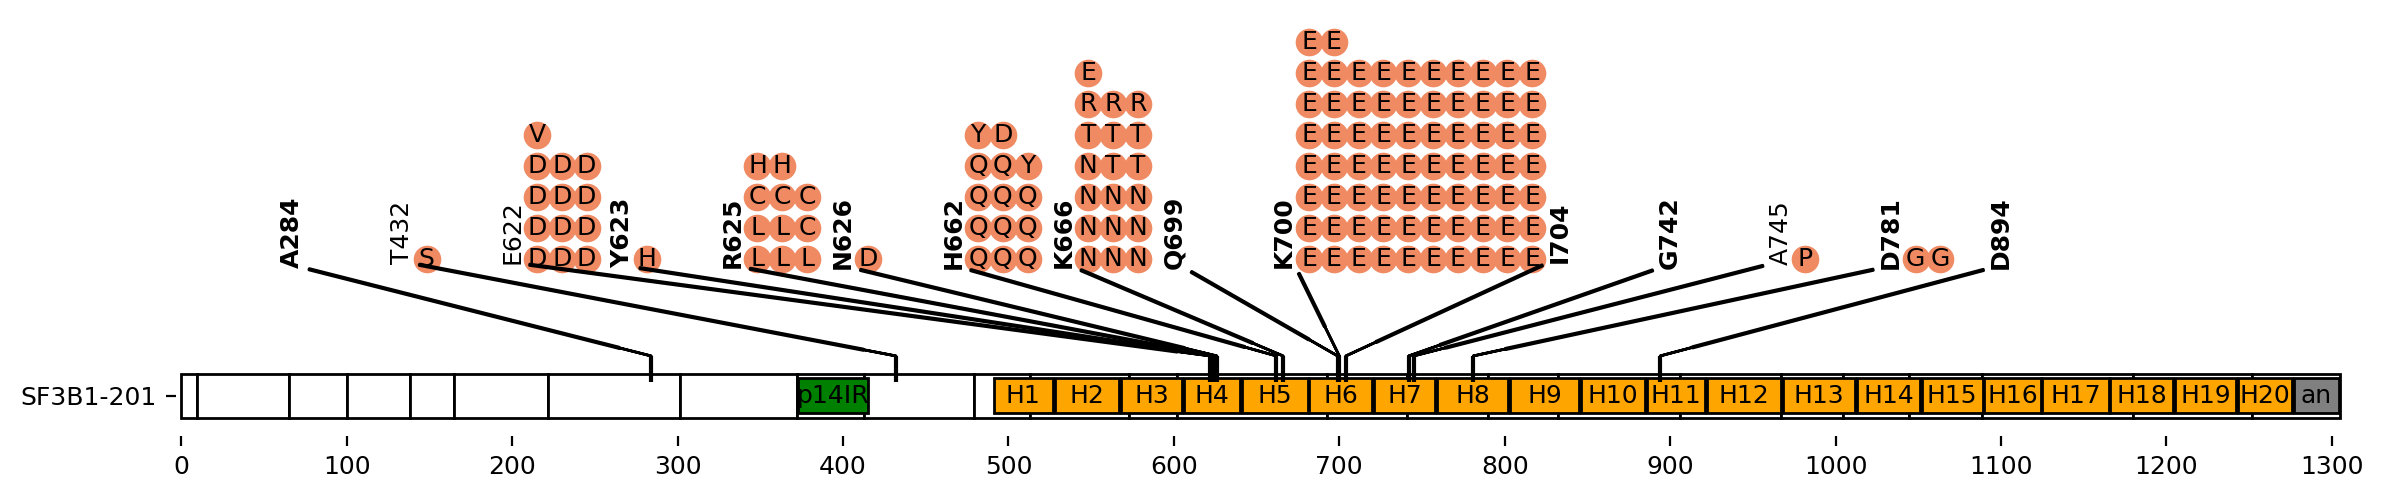

In [9]:
g=isoseq['SF3B1']
print(g)
plt.rcParams["font.size"]=9
plt.rcParams["figure.figsize"] = (14,2.7)
dom_cols={'domains':'green', 'repeat':'orange' ,'extracellular':'yellow', 'transmembrane':'pink', 'cytoplasmic':'red', "other":"grey"}
hotspot_region=(197402767,197401769)
from matplotlib.backends.backend_pdf import PdfPages
#add csv file to dataframe
with PdfPages(filename = f"{out_path}/golong_sf3b1_domains_MDS_RNAseq_samples.pdf") as pdf:    
    fig, ax=plt.subplots()
    #ref_trids=[2]
    #trids=g.filter_transcripts(query='SUBSTANTIAL')
    ax, gmap=g.plot_domains(source='annotation',categories=list(dom_cols), trids=False, ref_trids=[2], include_utr=False, domain_cols=dom_cols, seperate_exons=True, ax=ax)
    ax.set_xticks(np.arange(0,4000,300),np.arange(0,1400,100) )
    mut_pos={}
    offset=0
    for i,mut in enumerate(mutations):
        pos=int(mut[1:])*3
        mut_pos[mut]=200+i*200+offset
        ax.annotate(mut, (pos,0.7), (mut_pos[mut],2.1 ),arrowprops={'width':.5,'headwidth':0}, rotation=90, ha='center',va='center', weight='bold' if mut in found_pos else 'regular')
        ax.vlines(pos,.4,.7, color='k')
        if mut=='K700':
            offset+=300
    n_pos={}
    gn='MDS_mut'
    for mut, ng in mut_count.items():
        n_pos.setdefault(mut[:-1],0)
        n_row=10 if mut[:-1]=='K700' else 3
        for _ in range(ng):
            x,y=mut_pos[mut[:-1]]+45*(n_pos[mut[:-1]]%n_row+1), 1.8+.35*(n_pos[mut[:-1]]//n_row)
            #ax.plot(x,y, 'o', color=group_colors[gn], mec='gray', size=20)
            ax.scatter(x,y,  color=group_colors[gn],  s=80)
            rgb=tuple(int(group_colors[gn][i:i+2], 16) for i in (1, 3, 5))  
            ax.text(x,y,mut[-1],ha='center', va='center', color='white' if sum(rgb)/3<128 else 'black')
            #circle = plt.Circle((mut_pos[mut]+50*(n+i)%3, 1.7+10*(n+i)//3), 10, color=group_colors[gn+'_mut'])
            #ax.add_patch(circle)
            n_pos[mut[:-1]]+=1

            
    ax.set(frame_on=False)  
    ax.set_ylim(-.2,4.5)
    pdf.savefig(fig)